In [1]:
#https://zhiyzuo.github.io/python-modularity-maximization/
#pip install python-modularity-maximization==0.0.1rc4
import networkx as nx
nx.__version__

'2.6.1'

In [2]:
from modularity_maximization import partition
from modularity_maximization.utils import get_modularity

In [3]:

karate = nx.Graph(nx.read_pajek("data/karate.net.txt"))
print(nx.info(karate))

Graph with 34 nodes and 78 edges


In [7]:
from scipy.sparse.linalg import eigs

comm_dict = partition(karate)
for comm in set(comm_dict.values()):
    print("Community %d"%comm)
    print(', '.join([node for node in comm_dict if comm_dict[node] == comm]))
print('Modularity of such partition for karate is %.3f' % get_modularity(karate, comm_dict))

Community 3
1, 2, 3, 4, 8, 10, 12, 13, 14, 18, 20, 22
Community 4
5, 6, 7, 11, 17
Community 5
24, 25, 26, 28, 29, 32
Community 6
9, 15, 16, 19, 21, 23, 27, 30, 31, 33, 34
Calculating modularity for undirected graph
Modularity of such partition for karate is 0.419


In [8]:
jazz = nx.Graph(nx.read_pajek("data/jazz.net.txt"))
print(nx.info(jazz))

Graph with 198 nodes and 2742 edges


In [9]:
comm_dict = partition(jazz)

for comm in set(comm_dict.values()):
    print("Community %d"%comm)
    print(', '.join([node for node in comm_dict if comm_dict[node] == comm]))
print('Modularity of such partition for jazz is %.3f' % get_modularity(jazz, comm_dict))

Community 3
9, 59, 82, 84, 93, 94, 111, 116, 117, 118, 121, 125, 137, 143, 146, 175, 177, 183, 190, 193
Community 4
1, 8, 15, 16, 17, 20, 22, 23, 24, 32, 33, 35, 38, 40, 42, 43, 44, 46, 48, 50, 58, 60, 62, 63, 64, 65, 66, 68, 78, 80, 81, 91, 95, 98, 99, 100, 101, 104, 105, 106, 107, 108, 109, 110, 119, 120, 122, 123, 131, 132, 134, 135, 139, 154, 159, 162, 166, 168, 170, 171, 179, 182, 187, 188
Community 5
2, 7, 10, 11, 12, 14, 19, 30, 31, 34, 36, 49, 52, 53, 54, 55, 56, 57, 61, 67, 69, 70, 71, 72, 74, 83, 87, 89, 103, 112, 113, 114, 127, 129, 130, 141, 142, 150, 151, 158, 161, 164, 165, 174, 178, 185, 186, 192, 194, 195, 196, 197
Community 6
3, 4, 5, 6, 13, 18, 21, 25, 26, 27, 28, 29, 37, 39, 41, 45, 47, 51, 73, 75, 76, 77, 79, 85, 86, 88, 90, 92, 96, 97, 102, 115, 124, 126, 128, 133, 136, 138, 140, 144, 145, 147, 148, 149, 152, 153, 155, 156, 157, 160, 163, 167, 169, 172, 173, 176, 180, 181, 184, 189, 191, 198
Calculating modularity for undirected graph
Modularity of such partition f

In [10]:
big_10_football = nx.read_gml("data/football.gml.txt")
print(nx.info(big_10_football))

Graph with 115 nodes and 613 edges


In [11]:
comm_dict = partition(big_10_football)

In [12]:

for comm in set(comm_dict.values()):
    print("Community %d"%comm)
    print(', '.join([node for node in comm_dict if comm_dict[node] == comm]))

Community 7
NorthernIllinois, WesternMichigan, Akron, BallState, BowlingGreenState, Buffalo, CentralFlorida, CentralMichigan, Connecticut, EasternMichigan, Kent, MiamiOhio, Ohio, Toledo, Marshall
Community 8
VirginiaTech, BostonCollege, WestVirginia, Syracuse, Pittsburgh, Temple, Navy, Rutgers, MiamiFlorida
Community 10
FloridaState, NorthCarolinaState, Virginia, GeorgiaTech, Duke, NorthCarolina, Clemson, WakeForest, Maryland
Community 11
FresnoState, Rice, SouthernMethodist, Nevada, SanJoseState, TexasElPaso, Tulsa, TexasChristian, Hawaii
Community 12
Iowa, PennState, Northwestern, Wisconsin, Michigan, Purdue, OhioState, Minnesota, Illinois, MichiganState, Indiana
Community 14
KansasState, TexasTech, Baylor, Colorado, Kansas, IowaState, Nebraska, TexasA&M, NotreDame, Oklahoma, Texas, Missouri, OklahomaState
Community 15
Auburn, Alabama, Florida, Kentucky, LouisianaTech, LouisianaMonroe, Vanderbilt, MiddleTennesseeState, MississippiState, SouthCarolina, Tennessee, Mississippi, Georgia,

In [13]:
print('Modularity of such partition for football is %.3f' %\
      get_modularity(big_10_football, comm_dict))

Calculating modularity for undirected graph
Modularity of such partition for football is 0.601


In [14]:
#https://github.com/shobrook/communities
#pip install decorator==4.3
#pip install networkx==2.6.1

import numpy as np
import networkx as nx
print(nx.__version__)

from communities.algorithms import louvain_method
from communities.visualization import draw_communities
from communities.visualization import louvain_animation
from communities.utilities import modularity_matrix, modularity

adj_matrix = np.array([[0, 1, 1, 0, 0, 0],
                       [1, 0, 1, 0, 0, 0],
                       [1, 1, 0, 1, 0, 0],
                       [0, 0, 1, 0, 1, 1],
                       [0, 0, 0, 1, 0, 1],
                       [0, 0, 0, 1, 1, 0]])
communities, frames  = louvain_method(adj_matrix)
print(communities)

mod_matrix = modularity_matrix(adj_matrix)
Q = modularity(mod_matrix, communities)
print(Q)

#draw_communities(adj_matrix =adj_matrix, communities  = communities, seed =100,dark  = False)
#louvain_animation(adj_matrix, frames)

2.6.1
[{0, 1, 2}, {3, 4, 5}]
0.26530612244897955


In [15]:

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import copy
from networkx.algorithms import community
import matplotlib.animation as animation


def Add_Inner_edges(range, num):
    inner_edges = []
    while len(inner_edges) < num:
        tmp = np.sort(np.random.choice(range, size=2, replace=None)).tolist()
        tmp += [10*np.random.uniform(0, 1)]  # random weight
        new_edge = tuple(tmp)
        if new_edge not in inner_edges:
            inner_edges = inner_edges + [new_edge]
    return inner_edges


def Add_Outer_edges(Community_all, num):
    # 두 커뮤니티 선택
    outter_edges = []
    while len(outter_edges) < num:
        #group_choiced = np.random.choice(range(len(Community_all)), size=2, replace=None) # 범용적으로 커뮤니티 선택할 시
        if len(outter_edges) < 3:
            group_choiced = np.random.choice([0, 1], size=2, replace=None)
        elif len(outter_edges) < 6:
            group_choiced = np.random.choice([0, 2], size=2, replace=None)
        elif len(outter_edges) < 10:
            group_choiced = np.random.choice([1, 2], size=2, replace=None)
        tmp = np.sort([np.random.choice(Community_all[group_choiced[0]], replace=None),
                 np.random.choice(Community_all[group_choiced[1]], replace=None)]).tolist()
        tmp += [np.random.uniform(0, 1)]  # random weight
        new_edge = tuple(tmp)
        if new_edge not in outter_edges:
            outter_edges = outter_edges + [new_edge]
    return outter_edges


""" Network 생성 """
# 총 150명
G = nx.Graph()
G.add_nodes_from(range(150))
# Community 설정 3개의 커뮤니티
Community1 = range(0, 40)
Community2 = range(40, 90)
Community3 = range(90, 150)
Community_all = Community1, Community2, Community3

# 내부 연결 추가
Inner_edges_1 = Add_Inner_edges(range=Community1, num=300)  # Community 1 100개
Inner_edges_2 = Add_Inner_edges(range=Community2, num=300)  # Community 1 150개
Inner_edges_3 = Add_Inner_edges(range=Community3, num=300)  # Community 1 120개
G.add_weighted_edges_from(Inner_edges_1)
G.add_weighted_edges_from(Inner_edges_2)
G.add_weighted_edges_from(Inner_edges_3)

# 외부 연결 추가
Outter_edges = Add_Outer_edges(Community_all, 100)  # Community 1-2-3 간에 50개
G.add_weighted_edges_from(Outter_edges)
pos = nx.spring_layout(G)

com: 0
com: 1
com: 2


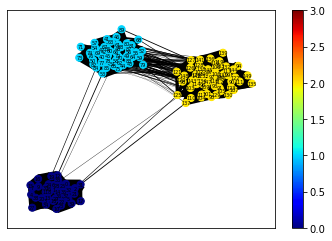

In [16]:
import community as lvcm


""" Louvain method """
#partition = lvcm.best_partition(graph=G, partition=None, weight='weight', resolution=1., randomize=True)
partition = lvcm.best_partition(graph=G)

max_k_w = []
for com in set(partition.values()):
    print("com:", com)
    list_nodes = [nodes for nodes in partition.keys()
                  if partition[nodes] == com]
    max_k_w = max_k_w + [list_nodes]

""" Make Community Color list """
community_num_group = len(max_k_w)
color_list_community = [[] for i in range(len(G.nodes()))]
for i in range(len(G.nodes())):
    for j in range(community_num_group):
        if i in max_k_w[j]:
            color_list_community[i] = j

""" Plot Community """
fig = plt.figure()
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
Feature_color_sub = color_list_community
node_size = 50
im = nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=Feature_color_sub, cmap='jet', vmin=0, vmax=community_num_group)
nx.draw_networkx_edges(G, pos, width=weights)
nx.draw_networkx_labels(G, pos, font_size=5, font_color="black")
plt.xticks([])
plt.yticks([])
plt.colorbar(im)
plt.show(block=False)

In [17]:
# display a graph with its communities:
# as Erdos-Renyi graphs don't have true community structure,
# instead load the karate club graph
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
G = nx.karate_club_graph()
# compute the best partition
partition = community_louvain.best_partition(G)


